### 1. Setup and Load Data

#### 1.1 Install Dependenices and Setup

In [1]:
!pip install tensorflow tensorflow gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu
You should consider upgrading via the 'C:\Users\aviparna.biswas\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.0.0
alabaster                          0.7.12
amqp                               5.1.1
anaconda-client                    1.9.0
anaconda-navigator                 2.1.4
anaconda-project                   0.10.1
anyio                              3.5.0
appdirs                            1.4.4
arcgis                             2.0.0
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asgiref                            3.5.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0.2
asttokens                          2.0.5
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              

You should consider upgrading via the 'C:\Users\aviparna.biswas\Anaconda3\python.exe -m pip install --upgrade pip' command.



colorama                           0.4.4
comtypes                           1.1.10
conda                              4.12.0
conda-build                        3.21.6
conda-content-trust                0+unknown
conda-pack                         0.6.0
conda-package-handling             1.8.0
conda-repo-cli                     1.0.4
conda-token                        0.3.0
conda-verify                       3.4.2
contextlib2                        0.6.0.post1
cookiecutter                       1.7.2
coreapi                            2.3.3
coreschema                         0.0.4
cryptography                       3.4.8
cycler                             0.11.0
cymem                              2.0.6
Cython                             0.29.28
cytoolz                            0.11.0
daal4py                            2021.5.0
dask                               2021.10.0
debugpy                            1.5.1
decorator                          4.4.2
defusedxml                      

pydantic                           1.8.2
pydocstyle                         6.1.1
pyerfa                             2.0.0
pyexcel                            0.7.0
pyexcel-io                         0.6.6
pyexcel-xlsx                       0.6.0
pyflakes                           2.3.1
Pygments                           2.7.3
PyJWT                              2.1.0
pylint                             2.9.6
pyls-spyder                        0.4.0
PyNaCl                             1.4.0
pyodbc                             4.0.32
pyOpenSSL                          21.0.0
pyparsing                          3.0.4
pypiwin32                          223
pyreadline                         2.1
pyrsistent                         0.18.0
pyshp                              2.2.0
PySocks                            1.7.1
pyspnego                           0.5.0
pytesseract                        0.3.9
pytest                             6.2.4
python-certifi-win32               1.7.dev1+g24a5d1b
pytho

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list.physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

AttributeError: module 'tensorflow._api.v2.config.experimental' has no attribute 'list'

#### 1.2 Remove dodgy images

In [5]:
import cv2
import imghdr

In [22]:
data_dir = 'data'

In [23]:
os.listdir(data_dir)

['grass-after-cut', 'grass-before-cut']

In [24]:
os.listdir(os.path.join(data_dir, 'grass-before-cut'))

['-lawn-texture-cutting-top-view-artificial-healthy-grass-field-lawn-193057982.jpg',
 '0010300_eight-seamless-photo-textures-of-grass-and-yard-3000x3000-pixels-green-uncut-grass_550.jpeg',
 '004355ef78fddde730a2f46cb9b1f4ac544234b8.jpg',
 '022-1.jpg',
 '0_WO_MC_grass_03jpgt.jpg',
 '1-4-26.jpg',
 '1000_F_109369291_Re3qpbWAiaWF9J8cptfBSyurD7HSFe6W.jpg',
 '1000_F_249824212_uKLyWBKr6lOqzhSCJnvm2k8bigCUWBJH.jpg',
 '1000_F_369759526_KkHaqZ7WOFIZijRuLU36oNUYa8BBvd56.jpg',
 '1000_F_92656193_ZCBO9o5QEndVYqEHMaA123j6hRwEwCOM.jpg',
 '100844752-natural-lush-grass-texture-in-park-uncut-spring-lawn.jpg',
 '12676848.jpg',
 '12676849.jpg',
 '12688596.jpg',
 '1511275521730.jpeg',
 '1511275531797.jpeg',
 '17dd61e0-def1-4c45-a16d-1740b4b2e13e_image_jpeg.jpg',
 '208353283.jpg',
 '2744852.5e69e56d1c091.jpeg',
 '307944598.jpg',
 '39636088-l-herbe-non-coupC3A9e-reste-dans-un-champ-rC3A9cemment-rC3A9coltC3A9es-.jpg',
 '399822824.jpg',
 '3Grasses_ph.2702.jpg',
 '404003921.jpg',
 '422876129.jpg',
 '54636636.jpg

In [25]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [26]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [27]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data\grass-after-cut\123720391-the-gardener-cutting-grass-by-lawn-mower-lawn-care-nature.jpg
Image not in ext list data\grass-after-cut\fresh-green-grass-smooth-lawn-260nw-1060573385.jpg
Image not in ext list data\grass-after-cut\freshly-cut-green-lawn-grass-260nw-1540065224.jpg
Image not in ext list data\grass-after-cut\green-grass-lawn-mowed-striped-260nw-1402702130.jpg
Image not in ext list data\grass-after-cut\green-lawn-backyard-background-grass-260nw-535659100.jpg
Image not in ext list data\grass-after-cut\IS-Cutting-Grass-with-Trimmer.jpg.webp
Image not in ext list data\grass-after-cut\v4-460px-Mow-a-Lawn-Step-15-Version-2.jpg.webp
Image not in ext list data\grass-after-cut\vector.svg
Image not in ext list data\grass-after-cut\vector10.svg
Image not in ext list data\grass-after-cut\vector11.svg
Image not in ext list data\grass-after-cut\vector12.svg
Image not in ext list data\grass-after-cut\vector13.svg
Image not in ext list data\grass-after-cut\vector14.s

#### 1.3 Load Data

In [28]:
tf.data.Dataset??

In [29]:
import numpy as np
from matplotlib import pyplot as plt 

In [44]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 459 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
# Get another batch from iterator
batch = data_iterator.next()

In [34]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [35]:
# CLASS 1 = BEFORE_CUT
# CLASS 2 = AFTER_CUT
batch[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

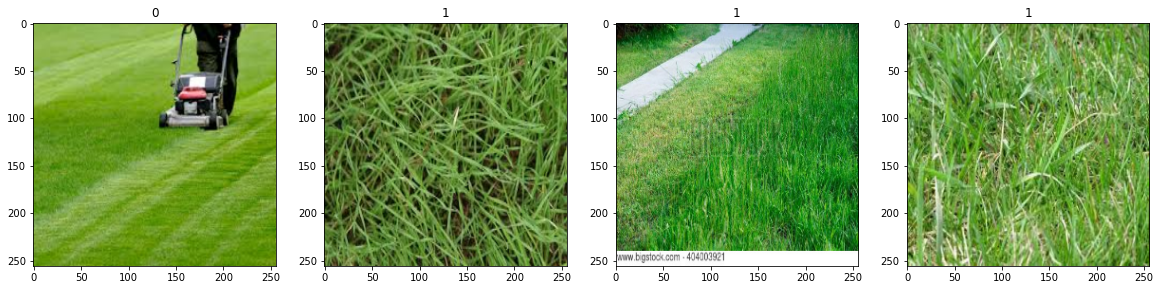

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2. Preprocess Data

#### 2.1 Scale Data

In [45]:
data = data.map(lambda x,y: (x/255,y))

In [46]:
scaled_iterator = data.as_numpy_iterator()

In [47]:
batch = scaled_iterator.next()

In [49]:
batch[0].max()

1.0

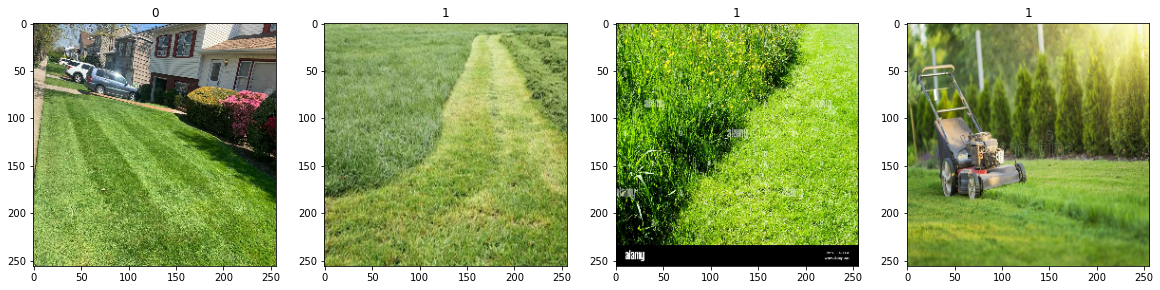

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [51]:
len(data)

15

In [59]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [60]:
train_size+val_size+test_size

15

In [61]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [64]:
len(test)

1

### 3. Deep Model

#### 3.1 Build Deep Learning Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [66]:
model = Sequential()

In [67]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 3.2 Train

In [70]:
logdir = 'logs'

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 0.8781 - accuracy: 0.5125 - val_loss: 0.6837 - val_accuracy: 0.5938
Epoch 2/20
10/10 [==============================] - 18s 2s/step - loss: 0.6743 - accuracy: 0.5875 - val_loss: 0.6522 - val_accuracy: 0.6094
Epoch 3/20
10/10 [==============================] - 19s 2s/step - loss: 0.6395 - accuracy: 0.6500 - val_loss: 0.6270 - val_accuracy: 0.6719
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.6468 - accuracy: 0.6344 - val_loss: 0.5913 - val_accuracy: 0.6562
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.5871 - accuracy: 0.6687 - val_loss: 0.5694 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 19s 2s/step - loss: 0.6088 - accuracy: 0.6687 - val_loss: 0.5579 - val_accuracy: 0.7734
Epoch 7/20
10/10 [==============================] - 18s 2s/step - loss: 0.5747 - accuracy: 0.6875 - val_loss: 0.4618 - val_accuracy: 0.8047
Epoch 8/20
10/10 [==

In [73]:
hist

In [74]:
hist.history

{'loss': [0.8780837059020996,
  0.6742811799049377,
  0.639522910118103,
  0.6467834711074829,
  0.587074875831604,
  0.6088250875473022,
  0.574731171131134,
  0.5706532597541809,
  0.48072558641433716,
  0.47801899909973145,
  0.4228668212890625,
  0.42468732595443726,
  0.3397338390350342,
  0.32233908772468567,
  0.24933259189128876,
  0.21603350341320038,
  0.19606979191303253,
  0.17438273131847382,
  0.14989151060581207,
  0.13092997670173645],
 'accuracy': [0.512499988079071,
  0.5874999761581421,
  0.6499999761581421,
  0.6343749761581421,
  0.668749988079071,
  0.668749988079071,
  0.6875,
  0.703125,
  0.7593749761581421,
  0.7562500238418579,
  0.8062499761581421,
  0.831250011920929,
  0.856249988079071,
  0.871874988079071,
  0.9125000238418579,
  0.918749988079071,
  0.921875,
  0.934374988079071,
  0.949999988079071,
  0.9468749761581421],
 'val_loss': [0.683703601360321,
  0.6522216200828552,
  0.627015233039856,
  0.5912766456604004,
  0.5694491267204285,
  0.55789923

#### 3.3 Plot Performance

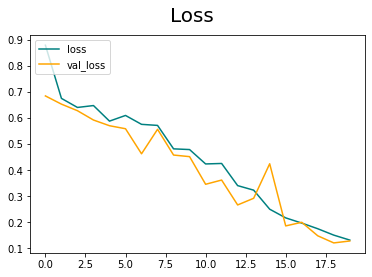

In [77]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

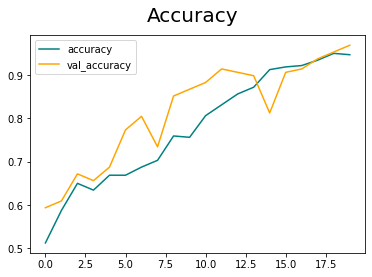

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 4. Evaluate Performance

#### 4.1 Evaluate

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [80]:
len(test)

1

In [81]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [82]:
print(f'Precison:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{re.result().numpy()}')

Precison:1.0, Recall:1.0, Accuracy:1.0


#### 4.2 Test

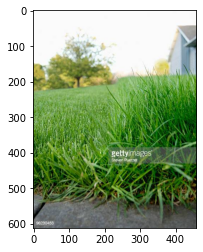

In [131]:
img = cv2.imread('uncutgrass-test-1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

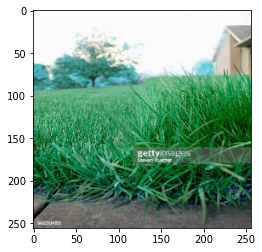

In [132]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [133]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        ...,
        [249.      , 249.      , 249.      ],
        [249.38628 , 249.38628 , 249.38628 ],
        [248.17773 , 248.17773 , 248.17773 ]],

       [[251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        ...,
        [249.      , 249.      , 249.      ],
        [248.93034 , 248.93034 , 248.93034 ],
        [247.70703 , 247.70703 , 247.70703 ]],

       [[251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        [251.      , 251.      , 251.      ],
        ...,
        [249.      , 249.      , 249.      ],
        [251.00737 , 251.00737 , 251.00737 ],
        [250.062   , 250.062   , 250.062   ]],

       ...,

       [[120.11328 , 118.11328 , 117.11328 ],
        [116.

In [134]:
np.expand_dims(resize, 0)

array([[[[251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         ...,
         [249.      , 249.      , 249.      ],
         [249.38628 , 249.38628 , 249.38628 ],
         [248.17773 , 248.17773 , 248.17773 ]],

        [[251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         ...,
         [249.      , 249.      , 249.      ],
         [248.93034 , 248.93034 , 248.93034 ],
         [247.70703 , 247.70703 , 247.70703 ]],

        [[251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         [251.      , 251.      , 251.      ],
         ...,
         [249.      , 249.      , 249.      ],
         [251.00737 , 251.00737 , 251.00737 ],
         [250.062   , 250.062   , 250.062   ]],

        ...,

        [[120.11328 , 118.11328 , 117.11328 ],
         [116.859375, 114.859375, 113.859375]

In [135]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [136]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [137]:
yhat

array([[0.96507466]], dtype=float32)

In [138]:
if yhat > 0.5:
    print(f'Predicted class is Uncut-grass')
else:
    print(f'Predicted class is Cut-grass')

Predicted class is Uncut-grass


### 5. Save the Model

#### 5.1 Save the Model

In [98]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('models','grassimageclassifier.h5'))

In [101]:
new_model = load_model(os.path.join('models','grassimageclassifier.h5'))

In [102]:
new_model

In [103]:
new_model.predict(np.expand_dims(resize/255,0))

array([[0.97140616]], dtype=float32)

In [104]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

In [105]:
if yhatnew > 0.5:
    print(f'Predicted class is Uncut-grass')
else:
    print(f'Predicted class is Cut-grass')

Predicted class is Uncut-grass
